<h1>Table of Contents<span class="tocSkip"></span></h1>


# Introduction
<hr style="border:2px solid black"> </hr>


**What?** Classifying text with Naive Bayes



# Imports
<hr style="border:2px solid black"> </hr>

In [29]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset
<hr style="border:2px solid black"> </hr>


- For simplicity, we will select just a few of these categories, and download the training and testing set. 



In [2]:
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [11]:
categories = ['talk.religion.misc', 
              'soc.religion.christian', 
              'sci.space',
              'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [35]:
# Here is a representative entry from the data:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [19]:
print(train.target_names)

['comp.graphics', 'sci.space', 'soc.religion.christian', 'talk.religion.misc']


In [17]:
train.target[5]

3

# Naive Bayes classifier
<hr style="border:2px solid black"> </hr>


- Because naive Bayesian classifiers make such stringent assumptions about data, they will generally not perform as well as a more complicated model. 
- That said, they have several advantages:
    - **[1]** They are extremely fast for both training and prediction
    - **[2]** They provide straightforward probabilistic prediction
    - **[3]** They are often very easily interpretable
    - **[4]** They have very few (if any) tunable parameters

- These advantages mean a naive Bayesian classifier is often a good choice as an initial baseline classification.
- Naive Bayes classifiers tend to perform especially well in one of the following situations:

    - **[1]** When the naive assumptions actually match the data (very rare in practice)
    - **[2]** For very well-separated categories, when model complexity is less important
    - **[3]** For very high-dimensional data, when model complexity is less important

- The last two points seem distinct, but they actually are related: as the dimension of a dataset grows, it is much less likely for any two points to be found close together (after all, they must be close in every single dimension to be close overall). 
- This means that clusters in high dimensions tend to be more separated, on average, than clusters in low dimensions, assuming the new dimensions actually add information. 
- For this reason, simplistic classifiers like naive Bayes tend to work as well or better than more complicated classifiers as the dimensionality grows.



# Modelling
<hr style="border:2px solid black"> </hr>


- One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified. 
- In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers. For this we will use the TF–IDF vectorizer, and create a pipeline that attaches it to a multinomial naive Bayes classifier:



In [21]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [22]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

# Evaluating the model
<hr style="border:2px solid black"> </hr>


- Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator. 
- For example, here is the confusion matrix between the true and predicted labels for the test data.



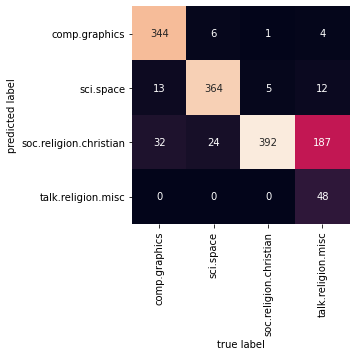

In [30]:
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');


- Evidently, even this very simple classifier can successfully separate space talk from computer talk, but it  gets confused between talk about religion and talk about Christianity. 
- This is perhaps an expected area of confusion!



# What is more?
<hr style="border:2px solid black"> </hr>


- The very cool thing here is that we now have the tools to determine the category for any string, using the predict() method of this pipeline. 
- Here’s a quick utility function that will return the prediction for a single string:



In [31]:
def predict_category(s, train=train, model=model): 
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [32]:
predict_category('sending a payload to the ISS')

'sci.space'

In [33]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [34]:
predict_category('determining the screen resolution')

'comp.graphics'

# Conclusions
<hr style="border:2px solid black"> </hr>


- Remember that this is nothing more sophisticated than a simple probability model for the (weighted) frequency of each word in the string; nevertheless, the result is striking. 
- Even a very naive algorithm, when used carefully and trained on a large set of high-dimensional data, can be surprisingly effective.



# References
<hr style="border:2px solid black"> </hr>


- VanderPlas, Jake. Python data science handbook: Essential tools for working with data. "O'Reilly Media, Inc.", 2016.
- https://github.com/jakevdp/PythonDataScienceHandbook
    
